In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv ('DarknetTraffic.csv')
print(len(df))
df

141041


,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Conn Type,Purpose
0,0,57158,225,443,6,1437768588,229,1,1,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,3
1,0,57159,225,443,6,1437768588,407,1,1,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,3
2,0,57160,225,443,6,1437768588,431,1,1,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,3
3,0,49134,225,443,6,1437768588,359,1,1,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,3
4,0,34697,225,19305,6,1437768585,10778451,591,400,64530,...,0,0,0,0,1.440000e+15,3.117718e+06,1.440000e+15,1.440000e+15,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141036,0,55219,0,5355,17,1432317303,411806,2,0,44,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3,8
141037,0,64207,0,5355,17,1432318145,411574,2,0,44,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3,8
141038,0,61115,0,5355,17,1432318771,422299,2,0,44,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3,8
141039,0,64790,0,5355,17,1432319395,411855,2,0,44,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3,8


In [3]:
# Remove duplicate entries
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

# Remove constant columns
df = df.loc[:, df.apply(pd.Series.nunique) != 1]
df = df.dropna(axis=0,how='any')
len(df)

116711

1    68990
2    23833
3    22853
4     1035
Name: Conn Type, dtype: int64

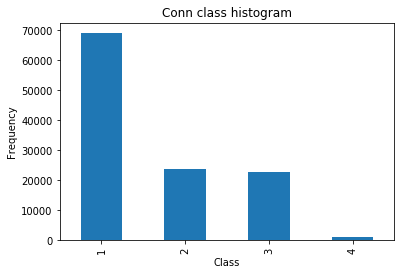

In [4]:
pd.value_counts(df['Conn Type']).plot.bar()
plt.title('Conn class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
df['Conn Type'].value_counts()

1    32683
2    24164
3    17894
4    11462
5    11093
6     9717
7     6137
8     3561
Name: Purpose, dtype: int64

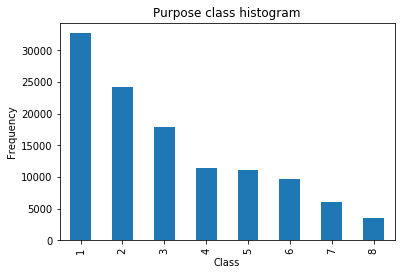

In [5]:
pd.value_counts(df['Purpose']).plot.bar()
plt.title('Purpose class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
df['Purpose'].value_counts()

In [6]:
best_features = ['Idle Max','FWD Init Win Bytes','Idle Mean','Idle Min','Fwd Seg Size Min',
                 'Subflow Fwd Packets', 'Flow Duration', 'Flow IAT Max','Flow IAT Min',
                 'Flow IAT Mean','Fwd Packets/s','Flow Packets/s','Bwd Init Win Bytes',
                 'Protocol','FIN Flag Count','Bwd Packets/s','Fwd IAT Max','Bwd Packet Length Mean',
                 'Bwd Packet Length Min','Fwd IAT Total','Purpose']
df = df[best_features]
df

,Idle Max,FWD Init Win Bytes,Idle Mean,Idle Min,Fwd Seg Size Min,Subflow Fwd Packets,Flow Duration,Flow IAT Max,Flow IAT Min,Flow IAT Mean,...,Flow Packets/s,Bwd Init Win Bytes,Protocol,FIN Flag Count,Bwd Packets/s,Fwd IAT Max,Bwd Packet Length Mean,Bwd Packet Length Min,Fwd IAT Total,Purpose
0,0.000000e+00,1892,0.000000e+00,0.000000e+00,20,0,229,229,229,229.00000,...,8733.624454,1047,6,2,4366.812227,0,0.0000,0,0,3
1,0.000000e+00,1987,0.000000e+00,0.000000e+00,20,0,407,407,407,407.00000,...,4914.004914,1047,6,2,2457.002457,0,0.0000,0,0,3
2,0.000000e+00,2049,0.000000e+00,0.000000e+00,20,0,431,431,431,431.00000,...,4640.371230,1047,6,2,2320.185615,0,0.0000,0,0,3
3,0.000000e+00,2008,0.000000e+00,0.000000e+00,20,0,359,359,359,359.00000,...,5571.030641,1047,6,2,2785.515320,0,0.0000,0,0,3
4,1.440000e+15,1382,1.440000e+15,1.440000e+15,20,0,10778451,78158,13,10887.32424,...,91.942711,2320,6,1,37.111084,81171,16.6475,0,10778451,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141036,0.000000e+00,0,0.000000e+00,0.000000e+00,8,1,411806,411806,411806,411806.00000,...,4.856656,0,17,0,0.000000,411806,0.0000,0,411806,8
141037,0.000000e+00,0,0.000000e+00,0.000000e+00,8,1,411574,411574,411574,411574.00000,...,4.859393,0,17,0,0.000000,411574,0.0000,0,411574,8
141038,0.000000e+00,0,0.000000e+00,0.000000e+00,8,1,422299,422299,422299,422299.00000,...,4.735981,0,17,0,0.000000,422299,0.0000,0,422299,8
141039,0.000000e+00,0,0.000000e+00,0.000000e+00,8,1,411855,411855,411855,411855.00000,...,4.856078,0,17,0,0.000000,411855,0.0000,0,411855,8


In [7]:
X = df.iloc[:, 0:(df.shape[1]-1)]#<----------features
Y = df.iloc[:, -1]#<---------labels  1 ---->purpose=traffic categorization
print(X.shape,Y.shape)                        #2------->conn type traffic detection  Tor n stuff
Y

(116711, 20) (116711,)


0         3
1         3
2         3
3         3
4         3
         ..
141036    8
141037    8
141038    8
141039    8
141040    8
Name: Purpose, Length: 116711, dtype: int64

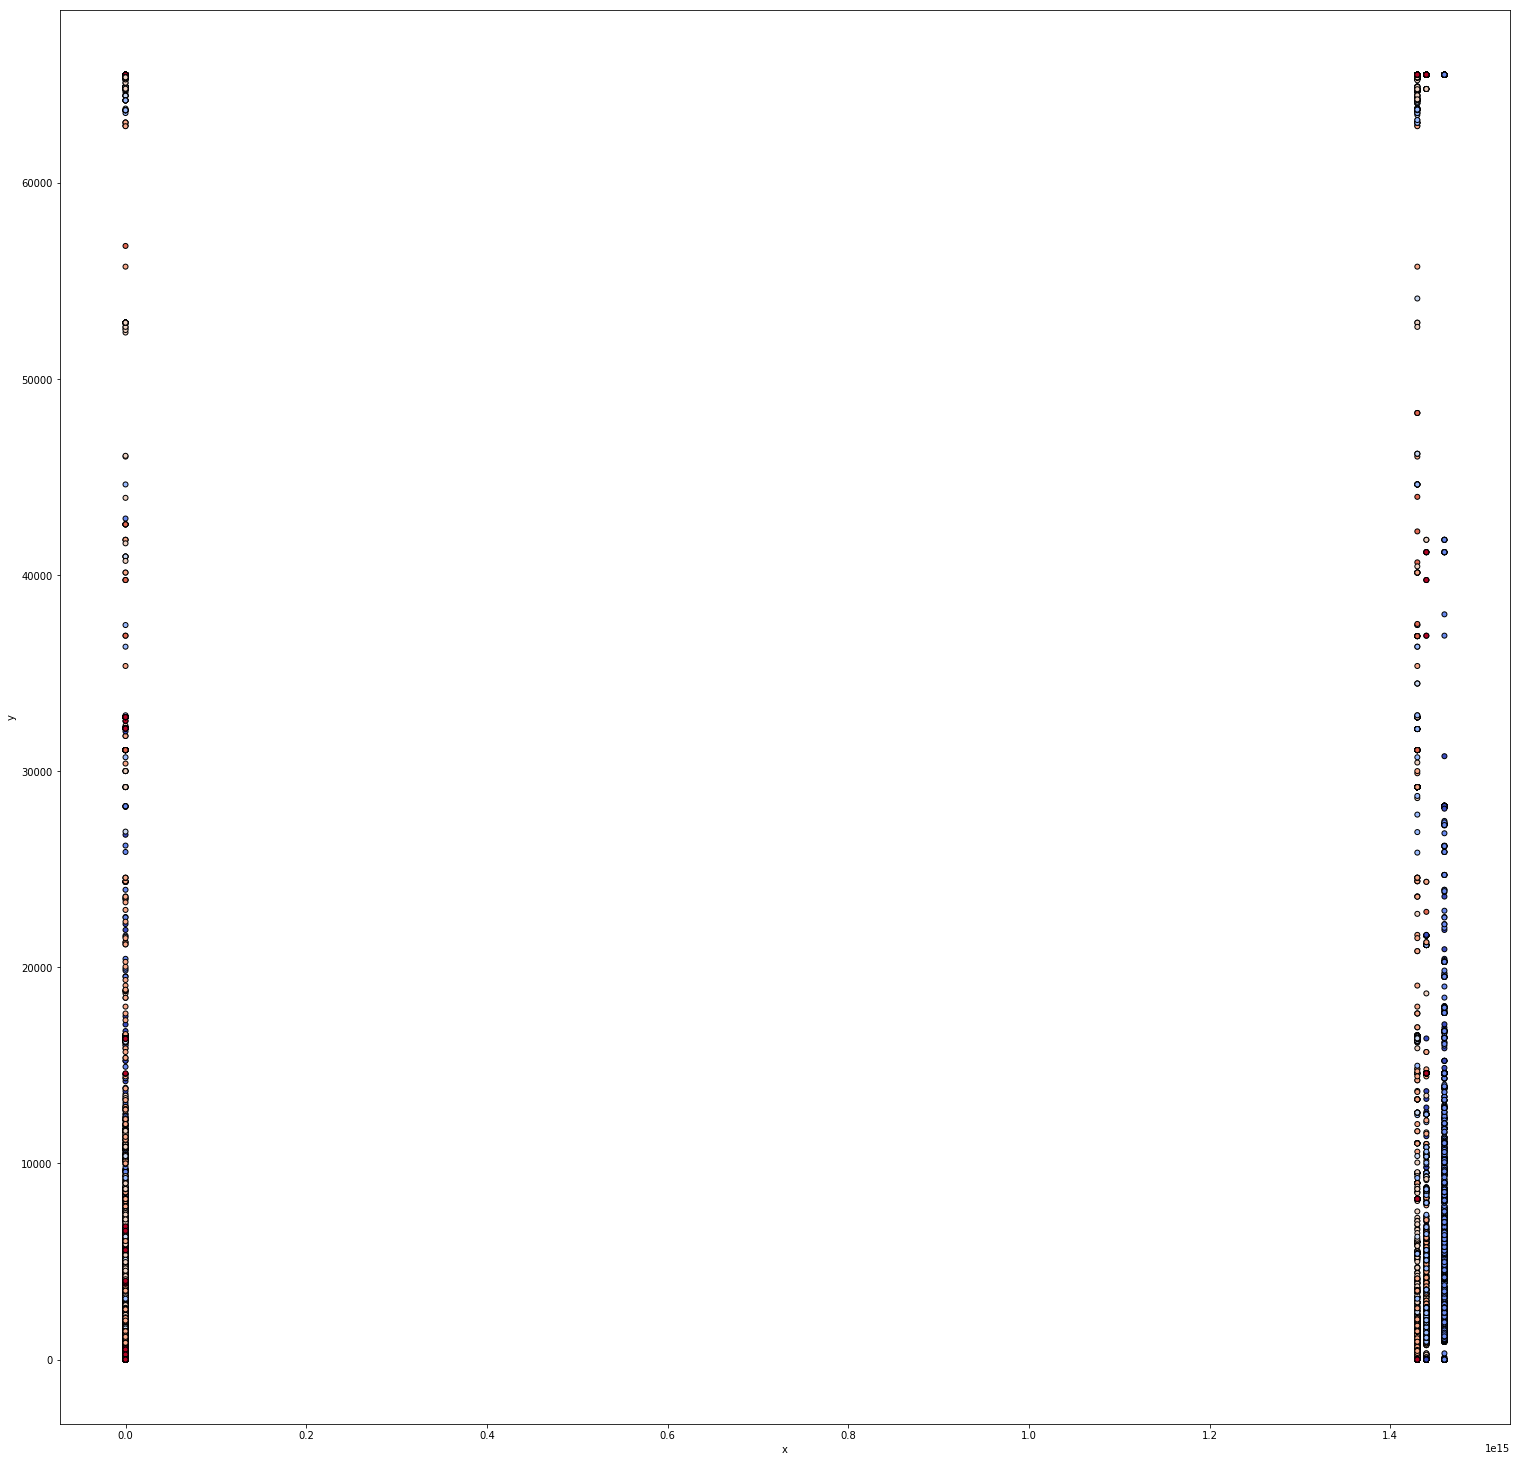

In [9]:
#SMOTE#
k=8
seed = 100
from imblearn.over_sampling import SMOTE

f = plt.figure()
f.set_figwidth(26)
f.set_figheight(26)
 

#plt.title('Dataset balanced with synthetic or SMOTEd data ({} neighbors)'.format(k))

plt.xlabel('x')

plt.ylabel('y')

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='o', c=Y,

           s=25, edgecolor='k', cmap=plt.cm.coolwarm)

plt.show()

In [10]:

sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)

X_res, y_res = sm.fit_resample(X, Y)


In [11]:
y_res

0         3
1         3
2         3
3         3
4         3
         ..
261459    8
261460    8
261461    8
261462    8
261463    8
Name: Purpose, Length: 261464, dtype: int64

(116711, 20) (116711,)


1    32683
2    24164
3    17894
4    11462
5    11093
6     9717
7     6137
8     3561
Name: Purpose, dtype: int64

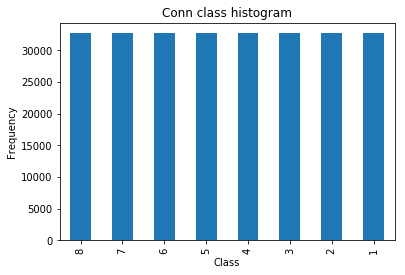

In [12]:
print(X.shape,Y.shape)
pd.value_counts(y_res).plot.bar()
plt.title('Conn class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
df['Purpose'].value_counts()

In [12]:
y_res

0         3
1         3
2         3
3         3
4         3
         ..
261459    8
261460    8
261461    8
261462    8
261463    8
Name: Purpose, Length: 261464, dtype: int64

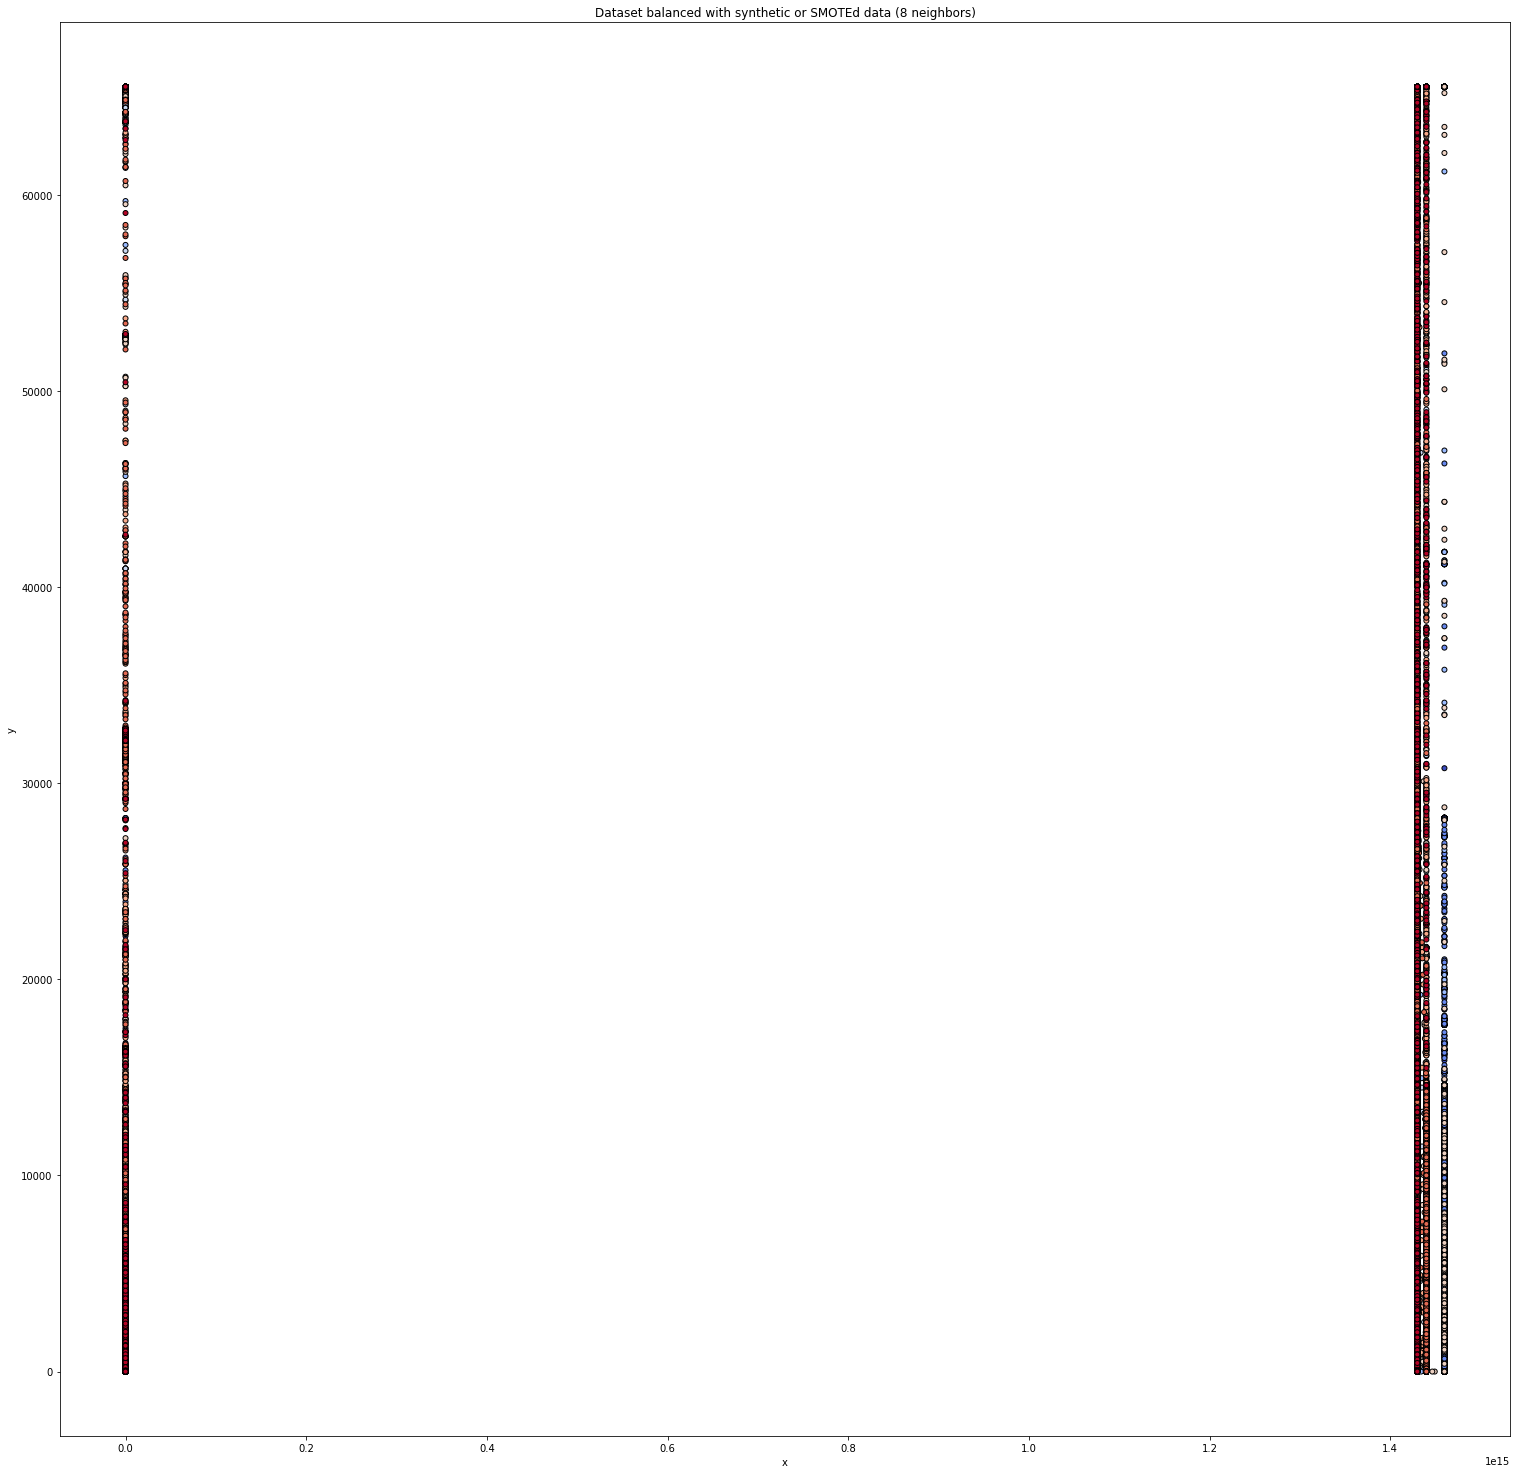

In [13]:
f = plt.figure()
f.set_figwidth(26)
f.set_figheight(26)
 

plt.title('Dataset balanced with synthetic or SMOTEd data ({} neighbors)'.format(k))

plt.xlabel('x')

plt.ylabel('y')

plt.scatter(X_res.iloc[:, 0], X_res.iloc[:, 1], marker='o', c=y_res,

           s=25, edgecolor='k', cmap=plt.cm.coolwarm)

plt.show()

Synthetic Minority Oversampling Technique

In [13]:
Xr = pd.DataFrame(X_res)
Yr = pd.DataFrame(y_res)
frames = [Xr, Yr]
result = pd.concat(frames,axis =1)
result

,Idle Max,FWD Init Win Bytes,Idle Mean,Idle Min,Fwd Seg Size Min,Subflow Fwd Packets,Flow Duration,Flow IAT Max,Flow IAT Min,Flow IAT Mean,...,Flow Packets/s,Bwd Init Win Bytes,Protocol,FIN Flag Count,Bwd Packets/s,Fwd IAT Max,Bwd Packet Length Mean,Bwd Packet Length Min,Fwd IAT Total,Purpose
0,0.000000e+00,1892,0.000000e+00,0.000000e+00,20,0,229,229,229,229.000000,...,8733.624454,1047,6,2,4366.812227,0,0.0000,0,0,3
1,0.000000e+00,1987,0.000000e+00,0.000000e+00,20,0,407,407,407,407.000000,...,4914.004914,1047,6,2,2457.002457,0,0.0000,0,0,3
2,0.000000e+00,2049,0.000000e+00,0.000000e+00,20,0,431,431,431,431.000000,...,4640.371230,1047,6,2,2320.185615,0,0.0000,0,0,3
3,0.000000e+00,2008,0.000000e+00,0.000000e+00,20,0,359,359,359,359.000000,...,5571.030641,1047,6,2,2785.515320,0,0.0000,0,0,3
4,1.440000e+15,1382,1.440000e+15,1.440000e+15,20,0,10778451,78158,13,10887.324240,...,91.942711,2320,6,1,37.111084,81171,16.6475,0,10778451,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261459,0.000000e+00,0,0.000000e+00,0.000000e+00,8,1,410077,410077,410077,410077.640440,...,4.877125,0,17,0,0.000000,410077,0.0000,0,410077,8
261460,0.000000e+00,0,0.000000e+00,0.000000e+00,8,1,409917,409917,409917,409917.838437,...,4.879027,0,17,0,0.000000,409917,0.0000,0,409917,8
261461,0.000000e+00,0,0.000000e+00,0.000000e+00,8,1,409731,409731,409731,409731.000000,...,4.881251,0,17,0,0.000000,409731,0.0000,0,409731,8
261462,0.000000e+00,0,0.000000e+00,0.000000e+00,8,0,117222,117222,117222,117222.054305,...,17.061636,0,17,0,8.530818,0,85.0000,85,0,8


In [15]:
Kresult = pd.concat([df, result])
Kresult.dropna(how='any')
Kresult.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)
len(Kresult)

237226

In [16]:
save = pd.DataFrame(Kresult)
  
# saving the dataframe
save.to_csv('Purpose.csv')
save

,Idle Max,FWD Init Win Bytes,Idle Mean,Idle Min,Fwd Seg Size Min,Subflow Fwd Packets,Flow Duration,Flow IAT Max,Flow IAT Min,Flow IAT Mean,...,Flow Packets/s,Bwd Init Win Bytes,Protocol,FIN Flag Count,Bwd Packets/s,Fwd IAT Max,Bwd Packet Length Mean,Bwd Packet Length Min,Fwd IAT Total,Purpose
0,0.000000e+00,1892,0.000000e+00,0.000000e+00,20,0,229,229,229,229.000000,...,8733.624454,1047,6,2,4366.812227,0,0.000000,0,0,3
1,0.000000e+00,1987,0.000000e+00,0.000000e+00,20,0,407,407,407,407.000000,...,4914.004914,1047,6,2,2457.002457,0,0.000000,0,0,3
2,0.000000e+00,2049,0.000000e+00,0.000000e+00,20,0,431,431,431,431.000000,...,4640.371230,1047,6,2,2320.185615,0,0.000000,0,0,3
3,0.000000e+00,2008,0.000000e+00,0.000000e+00,20,0,359,359,359,359.000000,...,5571.030641,1047,6,2,2785.515320,0,0.000000,0,0,3
4,1.440000e+15,1382,1.440000e+15,1.440000e+15,20,0,10778451,78158,13,10887.324240,...,91.942711,2320,6,1,37.111084,81171,16.647500,0,10778451,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261458,0.000000e+00,0,0.000000e+00,0.000000e+00,8,0,117348,117348,117348,117348.357131,...,17.043276,0,17,0,8.521638,0,89.123905,89,0,8
261459,0.000000e+00,0,0.000000e+00,0.000000e+00,8,1,410077,410077,410077,410077.640440,...,4.877125,0,17,0,0.000000,410077,0.000000,0,410077,8
261460,0.000000e+00,0,0.000000e+00,0.000000e+00,8,1,409917,409917,409917,409917.838437,...,4.879027,0,17,0,0.000000,409917,0.000000,0,409917,8
261462,0.000000e+00,0,0.000000e+00,0.000000e+00,8,0,117222,117222,117222,117222.054305,...,17.061636,0,17,0,8.530818,0,85.000000,85,0,8


In [52]:
#FEATURE EXTRACTION#

import numpy
from pandas import read_csv
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# load data
url = "X_res_SMOTE.csv"

best_features = ['Idle Max','FWD Init Win Bytes','Idle Mean','Idle Min','Fwd Seg Size Min',
                 'Subflow Fwd Packets', 'Flow Duration', 'Flow IAT Max','Flow IAT Min',
                 'Flow IAT Mean','Fwd Packets/s','Flow Packets/s','Bwd Init Win Bytes',
                 'Protocol','FIN Flag Count','Bwd Packets/s','Fwd IAT Max','Bwd Packet Length Mean',
                 'Bwd Packet Length Min','Fwd IAT Total']
train = "X_res_SMOTE.csv"
test = "y_res_SMOTE_det.csv"
dataframe_train = read_csv(train)
try:
    dataframe_train = dataframe_train[best_features]
except:
    print('check index')
array_train = dataframe_train.values
dataframe_test = read_csv(test)
try:
    dataframe_test = dataframe_test.drop(columns=['Unnamed: 0'])
except:
    print('check index')
array_test = dataframe_test.values
X = array_train[:]
X = StandardScaler().fit_transform(X)
Y = array_test[:]
# feature extraction
pca = PCA(n_components=2)
fit = pca.fit(X)
principalComponents = pca.fit_transform(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)


Explained Variance: [0.34305665 0.14872633]
[[-0.33687692 -0.27716585 -0.33938237 -0.32389761 -0.21225783  0.11933486
  -0.33243165 -0.21950473 -0.02102514 -0.09575084  0.0458304   0.05482278
  -0.26730461  0.25996162  0.03825818  0.05357787 -0.22004648 -0.15025801
   0.18181011 -0.33087836]
 [ 0.01281977  0.22071806  0.03383344  0.06899051  0.19687706 -0.20884756
  -0.05908812 -0.36495656 -0.39205652 -0.48323376  0.16942461  0.19303447
   0.203548   -0.15230007  0.13875979  0.17050647 -0.36556826  0.15091356
  -0.01949084 -0.05668554]]


In [41]:
#dataset = dict(zip(names,fit.components_[0]))
#top_features = sorted(dataset.items(), key=lambda x: x[1])
#,'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9', 'PC10','PC11', 'PC12','PC13', 'PC14', 'PC15', 'PC16','PC17', 'PC18','PC19', 'PC20'

In [42]:
principalComponents

array([[ 1.68878117,  1.1350871 ],
       [ 1.67458881,  1.09134395],
       [ 1.67296231,  1.08869381],
       ...,
       [-4.57943264, -0.04880854],
       [-1.74541965,  1.63329889],
       [-2.04922678,  1.3678368 ]])

In [53]:
import pandas as pd
PCA_df = pd.DataFrame(data = principalComponents, columns = ['PC1','PC2'])

#target = pd.Series(iris['PC20'], name='PC20')

result_df = pd.concat([PCA_df, dataframe_test['Conn Type']], axis=1)
result_df.tail(5)

,PC1,PC2,Conn Type
275955,-3.742383,1.653448,4
275956,-1.145378,0.285273,4
275957,-4.579433,-0.048809,4
275958,-1.745420,1.633299,4
275959,-2.049227,1.367837,4


<Figure size 1872x1872 with 0 Axes>

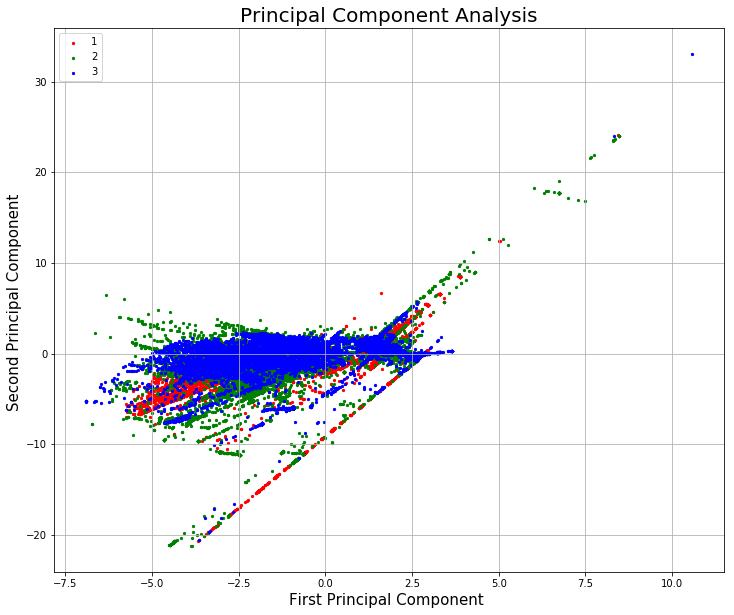

In [56]:
f = plt.figure()
f.set_figwidth(26)
f.set_figheight(26)

fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('First Principal Component ', fontsize = 15)
ax.set_ylabel('Second Principal Component ', fontsize = 15)
ax.set_title('Principal Component Analysis', fontsize = 20)

targets = [1, 2, 3, 4]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = dataframe_test['Conn Type'] == target
    ax.scatter(result_df.loc[indicesToKeep, 'PC1'], 
               result_df.loc[indicesToKeep, 'PC2'], 
               c = color, 
               s = 50)
ax.legend(targets)
ax.grid()

In [57]:
save = pd.DataFrame(result_df)
  
# saving the dataframe
save.to_csv('PCA.csv')
save

,PC1,PC2,Conn Type
0,1.688781,1.135087,1
1,1.674589,1.091344,1
2,1.672962,1.088694,1
3,1.676618,1.099199,1
4,-0.599398,0.952555,1
...,...,...,...
275955,-3.742383,1.653448,4
275956,-1.145378,0.285273,4
275957,-4.579433,-0.048809,4
275958,-1.745420,1.633299,4
